In [140]:
import pandas as pd
df_logins = pd.read_json("logins.json")
df_logins

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
...,...
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38


In [141]:
df_logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [142]:
df_logins.isnull().sum()

login_time    0
dtype: int64

In [143]:
#to date time 
df_logins['login_time'] = pd.to_datetime(df_logins['login_time'], errors='coerce')
#df_logins['login_time'] = df_logins.index

In [144]:
df_logins_15 = df_logins.resample('15Min', on='login_time').count()

<AxesSubplot:xlabel='login_time'>

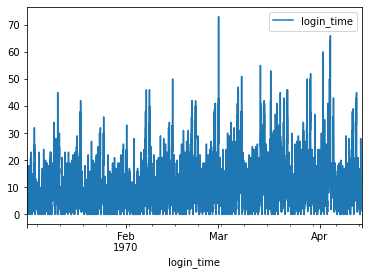

In [145]:
df_logins_15.plot()

In [146]:
df_logins_D = df_logins.resample('D', on='login_time').count()

<AxesSubplot:xlabel='login_time'>

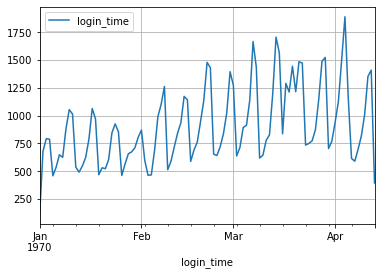

In [148]:
df_logins_D.plot(grid = True)

<AxesSubplot:xlabel='login_time'>

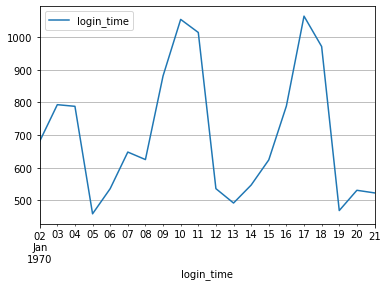

In [155]:
#Make a closer look
df_logins_slice_D = df_logins_D.iloc[1:21]
df_logins_slice_D.plot(grid = True)

As we can see the the number of logins  is low on Jan05 Monday, and it starts to increase  till the weekend, Saturday where  there is a spike and it falls, Tuesday Jan 13 is the lowest. We can see there is weekly seasonal pattern of the data. 

The most important question is if there is the increasing trend or not. Using the decomposition , I am planning to use the additive model, here we don't see the big change in th magnitude of the seasonal pattern over time.

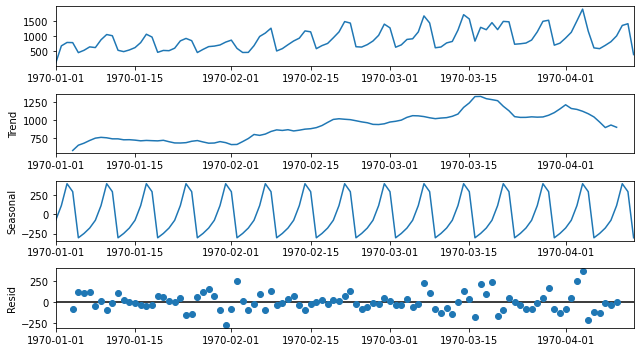

In [177]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(df_logins_D, model = 'additive')
fig = decomposition.plot()
plt.rcParams['figure.figsize'] = [9.0, 5.0]


Now we have more clear picture. We can see there is increasing but doesn't last longand ater that the is gradual slow down on number of login. The seasonality has the clear regualar pattern.

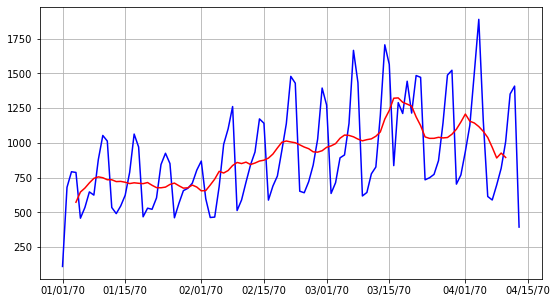

In [181]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
fig, ax = plt.subplots()
ax.grid(True)
year_format = mdates.DateFormatter('%D')
ax.xaxis.grid(True, which = 'minor')
ax.xaxis.set_major_formatter(year_format)
plt.plot(df_logins_D.index, df_logins_D['login_time'], c='blue')
plt.plot(decomposition.trend.index, decomposition.trend, c='red')

Again, we can see the trend decreasing from the March 15. This gives more clear idea to see the observation and the trend in same graph. 

### Second take home challegne

In [156]:
#df_logins_D['login_time'] = df_logins_D.index

We can see the ups and down at every point and it looks like seasonal pattern. But just by this graph doesn't completely tell if there is upward trend in of the user login in upcoming month. Here data is limited to just four months so we are not able to see the trend weekly or monthly. 

import matplotlib.pyplot as plt

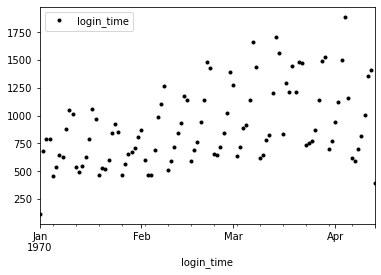

In [103]:
df_logins_15.plot(style='k.')
plt.show()

In [26]:
df_challenge = pd.read_json("ultimate_data_challenge.json")
df_challenge.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [40]:
df_logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [65]:
df_logins['login_time'] = df_logins.index

### Predictive Modeling

In [99]:
import pandas as pd
df = pd.read_json('ultimate_data_challenge.json')
df

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [101]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [102]:
df.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [103]:
df['trips_in_first_30_days'].value_counts(normalize = True)[:10]

0    0.30780
1    0.28216
2    0.14804
3    0.07576
4    0.05124
5    0.03232
6    0.02268
7    0.01638
8    0.01178
9    0.00942
Name: trips_in_first_30_days, dtype: float64

More than 60% do at least one trip and 16%  percent do at least 5 trips.

### Data Cleaning

In [104]:
#fill missing values with median value
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean())

In [105]:
df['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean())

In [106]:
#drop the null values for no phone information.
df = df.dropna(subset = ['phone'])

In [107]:
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

/opt/anaconda3/envs/Python37/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [108]:
recent_date = df['last_trip_date'].max()

In [109]:
df['active'] = df['last_trip_date'].apply(lambda date: 0 if (recent_date-date).days>30 else 1)

/opt/anaconda3/envs/Python37/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    49604 non-null  object        
 1   trips_in_first_30_days  49604 non-null  int64         
 2   signup_date             49604 non-null  object        
 3   avg_rating_of_driver    49604 non-null  float64       
 4   avg_surge               49604 non-null  float64       
 5   last_trip_date          49604 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               49604 non-null  float64       
 8   ultimate_black_user     49604 non-null  bool          
 9   weekday_pct             49604 non-null  float64       
 10  avg_dist                49604 non-null  float64       
 11  avg_rating_by_driver    49604 non-null  float64       
 12  active                  49604 non-null  int64 

In [111]:
df['active'].value_counts(normalize = True)*100

0    62.35989
1    37.64011
Name: active, dtype: float64

#### 37% of the users are active users which we determined if he made a trip in last 30 days. Here I want to build the supervised classifier model to classify the drivers as per the given features

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='active', ylabel='avg_dist'>

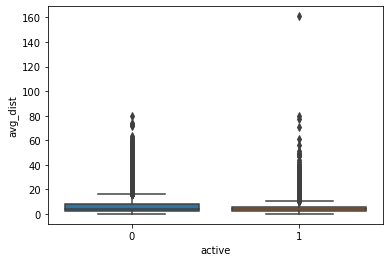

In [113]:
sns.boxplot(data=df,x='active',y='avg_dist')

<AxesSubplot:xlabel='active', ylabel='avg_dist'>

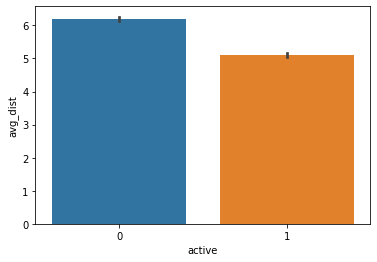

In [114]:
sns.barplot(data=df,x='active',y='avg_dist')

In [118]:
pd.pivot_table(df,index='active',aggfunc={'avg_dist':['median','std', 'mean']})

avg_dist                 
            mean median       std
active                           
0       6.190725   4.03  6.184010
1       5.113930   3.73  4.617779

(3.0, 5.2)

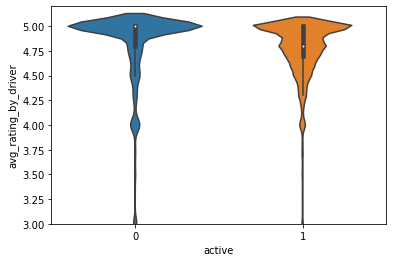

In [115]:
sns.violinplot(data=df,x='active',y='avg_rating_by_driver')
plt.ylim([3.0,5.2])

In [116]:
pd.pivot_table(df,index='active',aggfunc={'avg_rating_by_driver':['median','std', 'mean']})

avg_rating_by_driver                 
                       mean median       std
active                                      
0                   4.78699    5.0  0.503848
1                   4.76274    4.8  0.328707

In [117]:
pd.pivot_table(df,index='active',aggfunc={'trips_in_first_30_days':['mean','std']})

trips_in_first_30_days          
                         mean       std
active                                 
0                    1.657033  2.655767
1                    3.304804  4.985057

We find differnce in avg_dist, avg_rating_by_driver and trips_in_first_30_days  for the active users. 

In [140]:
df['phone'].value_counts(normalize = True)

iPhone     0.697162
Android    0.302838
Name: phone, dtype: float64

### Model

In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

In [122]:
df_features = pd.get_dummies(df,columns=['city','phone','ultimate_black_user'])
target = df_features['active']
df_features = df_features.drop(['last_trip_date','signup_date','active'],axis=1)

In [124]:
scaler = QuantileTransformer()
scaled_features = scaler.fit_transform(df_features)

In [125]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2,random_state=42)

In [126]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [127]:
rf.score(X_test,y_test)

0.7505291805261567

In [129]:
import numpy as np
cv_score = cross_val_score(rf,X_test,np.ravel(y_test),cv=5)
mean_cv_score = np.mean(cv_score)

In [130]:
rf.feature_importances_

array([0.08037511, 0.08207322, 0.06666654, 0.07908775, 0.13398501,
       0.29999769, 0.11192181, 0.01565548, 0.04683311, 0.01089923,
       0.02012873, 0.01924992, 0.01627778, 0.01684863])

In [131]:
df_features.columns

Index(['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver',
       'city_Astapor', 'city_King's Landing', 'city_Winterfell',
       'phone_Android', 'phone_iPhone', 'ultimate_black_user_False',
       'ultimate_black_user_True'],
      dtype='object')

In [133]:
feature_importance = pd.DataFrame(zip(list(df_features.columns),rf.feature_importances_),  columns=['feature','importance'])

In [136]:
feature_importance.sort_values(by = 'importance', ascending = False)

,feature,importance
5,avg_dist,0.299998
4,weekday_pct,0.133985
6,avg_rating_by_driver,0.111922
1,avg_rating_of_driver,0.082073
0,trips_in_first_30_days,0.080375
3,surge_pct,0.079088
2,avg_surge,0.066667
8,city_King's Landing,0.046833
10,phone_Android,0.020129
11,phone_iPhone,0.019250


In [137]:
confusion_matrix(y_test,y_pred)

array([[4966, 1234],
       [1241, 2480]])

In [ ]:
We built the model with 75% accuracy which can be use for the future prediction of the rider who makes trip in the 30 days, known as active in our model. Features like avg_distance,weekday_pct and average rating by 
that play importatn role in determining whether he is active or not. There can also be possibility of  other classifier model giving better accuracy then random forest classifier.Here random forest did well so I didn't look for other models. 

Mean average distance is less for the active user compare to inactive, but the model shows this features is an importat feature in determining it as an active. 
As the number of trips in the first 30 days increases, so does the chance that a rider is active after 6 months. But the higher rating by the driver doesn't determine he is  active. 



Based on these insights gained from the model, there are several recomendations for the company.

Offer some rewards to increase the user from the city King's Landing which determine the active user
There are 69% users for iphone but the android users helps to determine the active user, so encourage Android users.
Encourage drivers not to artificially inflate the ratings they give to users, especially if the driver can tell that they've never done this before.